# Final Report

Transplant the necessary code from `eda.ipynb` to this notebook, and clean everything up for presentation!

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np



# Reading in the airline csv file and converting the date column to date-time

In [39]:
airline_delays = pd.read_csv('data/airline_delays_1_year.csv')
airline_delays['date'] = pd.to_datetime(airline_delays['month'], format='%Y-%m')

# Dropping in null value rows

In [40]:
df = airline_delays.dropna(how='any', subset=['arr_flights'])

# Checking for null values

In [41]:
def check_null_values(df):
    if df.isnull().values.any():
        display(df.isnull().sum())
    else:
        display("Null values don't exist")

# This is a pie chart showing the Top Airports with the most arrivals

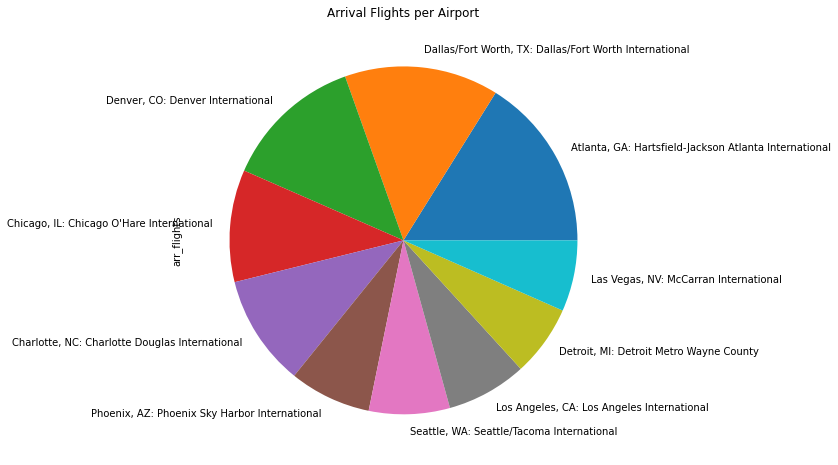

In [42]:
ax = (
    airline_delays
    .groupby('airport_name')
    .arr_flights
    .sum() 
    .sort_values(ascending=False) 
    .head(10) 
    .plot(
        kind='pie',
        figsize=(20,8),
        title='Arrival Flights per Airport',
    )
)

# A pivot table showing the number of delays per month per carrier

Text(0.5, 1.0, 'Total Delays per Carrier Per Month')

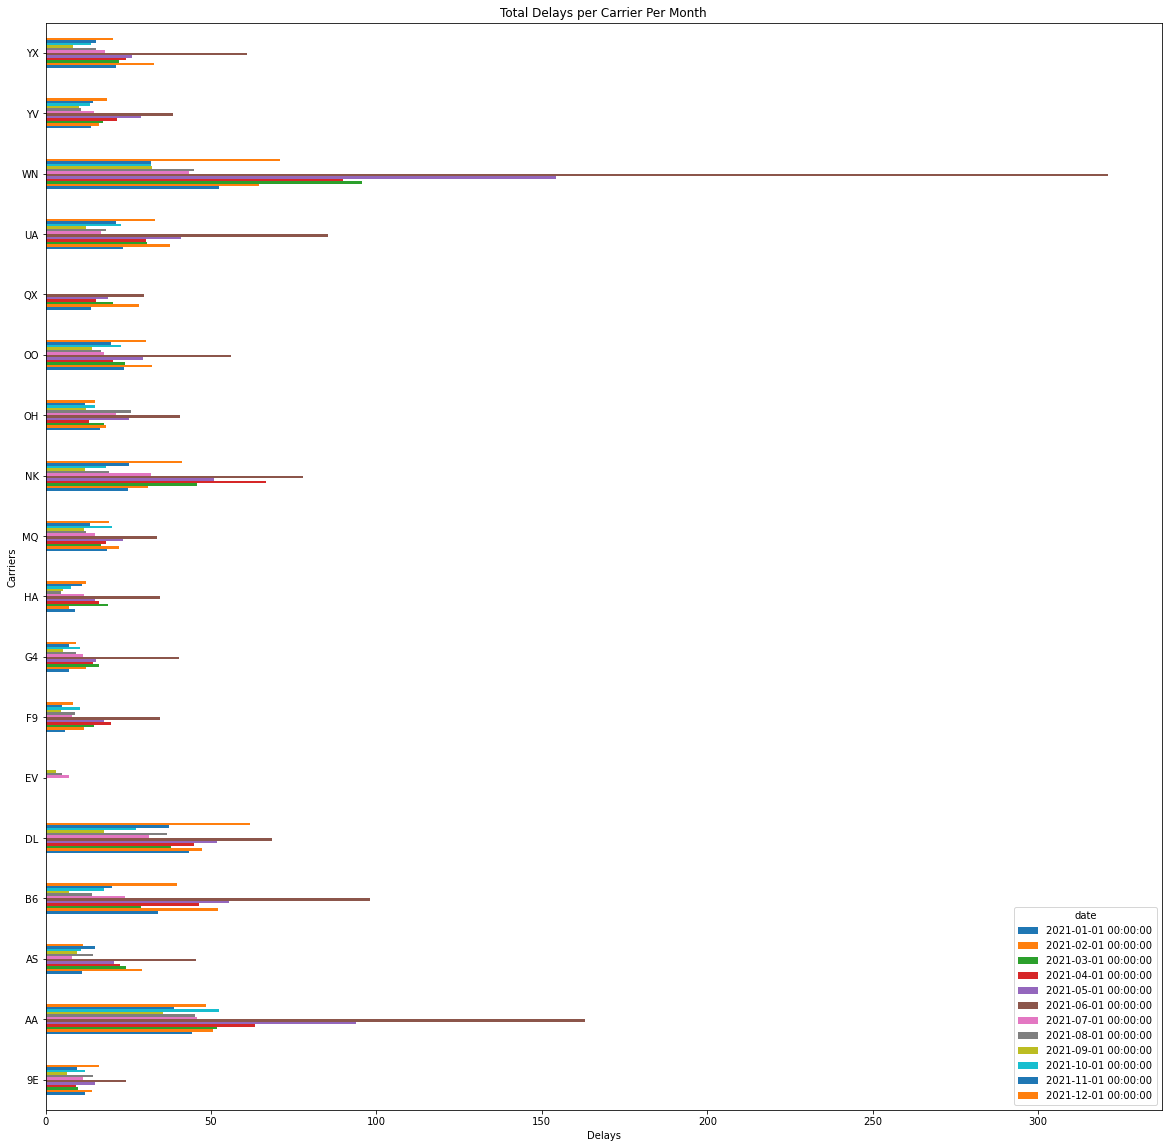

In [46]:
carrier_delay_by_month = pd.pivot_table(airline_delays, index="carrier", columns="date", values="arr_del15",)

carrier_delay_by_month.plot(kind='barh', figsize=(20,20));

plt.xlabel('Delays')
plt.ylabel('Carriers')
plt.title('Total Delays per Carrier Per Month')

# Showing the comparison of how many arriving flights to delayed flights.

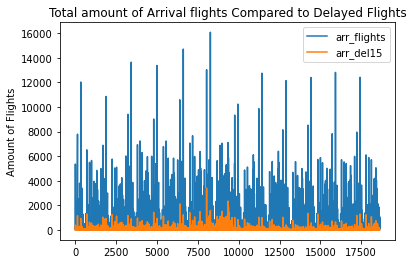

In [49]:
delay_df = arriving_flights[['arr_flights', 'arr_del15']]
delay_df.plot();


plt.ylabel('Amount of Flights')
plt.title('Total amount of Arrival flights Compared to Delayed Flights');